## Presentation Types:  Fuga, ID, and PEN with Verovio



### What Can You Do with this Notebook?


* This function uses several other functions to classify the entries in a given piece.

#### Key Features
* The output is a list, in order of offset, of each presentation type, including information about:
    - measures/beats
    - starting offset
    - **soggetti** involved (set the length of the soggetti with `melodic_ngram_length`, by default this is set to **4**, and uses diatonic intervals)
    - **melodic intervals** between successive entries (expressed as directed intervals, such as `P-5, P-8`)
    - **time intervals** between successive entries (expressed as offsets, like `8.0, 4.0, 8.0`)
    - **Labels Fuga, PEn, and ID** according to time intervals between entries. NIm not yet supported.
    - Reports **voice names of the entries**, in order of their appearance
    
#### Singletons, Long Gaps, and Parallel Entries

* Other features include:

    - Singleton soggetti (just one entry of a given motive in isolation) are not reported
    - If two entries are separated by more than about 9 bars (70 offsets), the tool resets to a new pattern
    - Identifies **Parallel Entries** in any passage.  If two voices enter at the same offset (normally in parallel thirds or tenths), the function will attempt to identify the voice that follows (or preceeds) other, non-parallel voices at the interval P1, P4, P5, P8, or P12 (which are more typical).  If neither of the parallel voices aligns with other parts in this way, the tool takes the upper-most voice as the real entry.  The parallel voice is removed from the pattern data, but the name of the voice is stored in another column (**Parallel Voice**).
    - Identifies the number of **Non Overlapping Entries** and reports the count in a separate column
      
#### Unisons, Flexes, and Hidden Entries
* In addition, the latest version of the tool offers a number of other important features:
     - **combine unisons** in the melodies under comparison (default = False).  This can be especially helpful when comparing different compositions based on the same model.
     - allow **melodic flexes** among the matching soggetti included in any particular event.  The flexing can be focused on the **first interval** with `head_flex` (default = 1), or permitted in any position with `body_flex` (default = 0). The latter are determined via a side-by-side comparison of all soggetti:  the threshold determines the cumulative difference among all successive intervals in each pair.  The presence of **flexed entries** is reported in a separate column, and all matching soggetti are reported in the soggetti column as a list.
     - the option to find **hidden PENs and IDs** among longer Fugas.  Set to false by default, passing `include_hidden_types=True` will instead consider **every combination** of voices in each Fuga, identifying sets of three or four voices that form PEns and IDs.  Both the complete pattern and the hidden patterns will be reported.
     
####  Typical Settings:

```
piece.presentationTypes(limit_to_entries = True,
                            head_flex=1,
                        body_flex = 0,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)
```
     
#### Verovio Rendering of Excerpts
     
* It is also possible to display the results of the Presentation Type classifier in the Notebook with Verovio. Each excerpt lasts from the first bar of the first entry through four bars after the start of the last entry.

The function also displays metadata about each excerpt, drawn from the presentation type results dataframe: piece ID, composer, title, measures, presentation type, beat of the bar in which the final tone is heard, and evaded status.

To use the function, pass the piece, cadence data frame, url of the piece, and mei_file name (all loaded in the first part of this notebook) as follows:

* For a very simple displayt of presentation types using default settings:

```
piece.verovioPtypes()
```

* Otherwise you might want to filter the p_types or use custom settings.  In this case first you will need to create the p_types list, either with custom settings (see the possibilities above) or filter them.  

```
p_types = piece.presentationTypes()
```


*After you filter or otherwise refine the results, pass these to verovioPtypes():

```
piece.verovioPtypes(p_types)
```



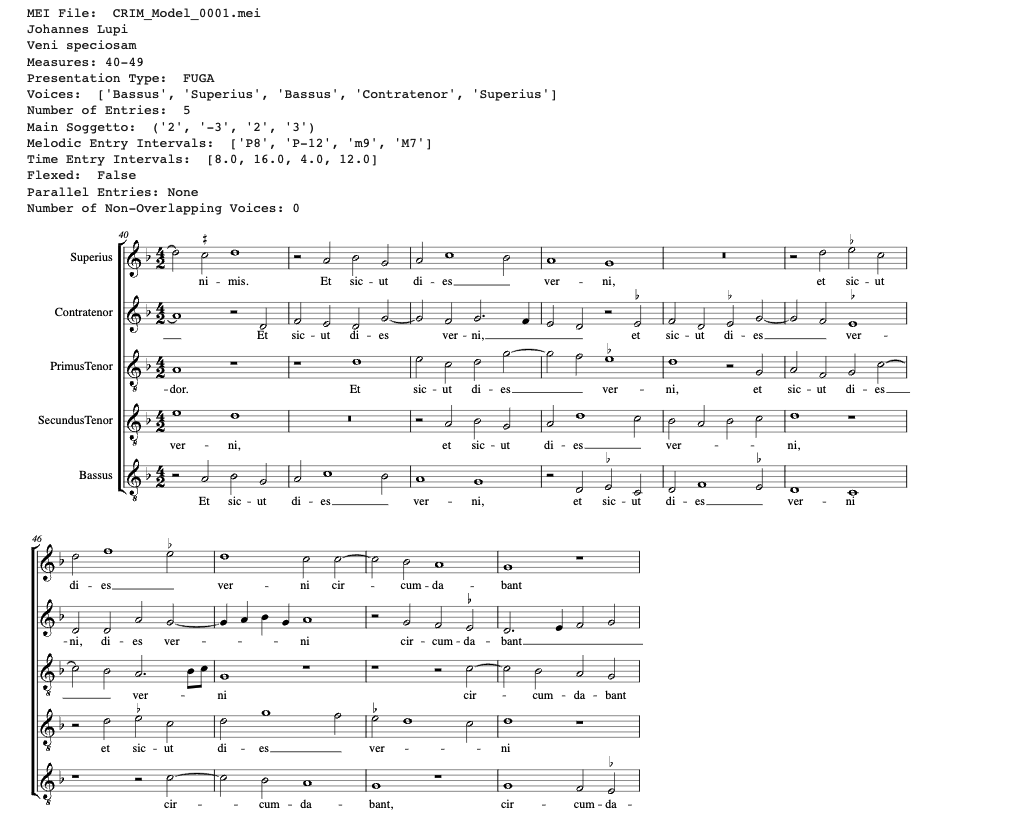

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import pandas as pd
import re
import os
import numpy
import itertools
# import collections
MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


In [2]:
# Select a prefix:

# prefix = 'Music_Files/'
# just add the CRIM Piece ID here
prefix = 'https://crimproject.org/mei/'
# just add the CRIM Piece ID here
mei_file = 'CRIM_Model_0032.mei'
url = prefix + mei_file
piece = importScore(url)

print(piece.metadata)

{'title': 'Sancta et immaculata virginitas', 'composer': 'Cristóbal de Morales', 'date': 1546}


## Find Presentation Types
* `piece.presentationTypes()`

- limit to entries (following rests or section) = `limit_to_entries = True`.
- allowing 'moving window' of all patterns in every voice = `limit_to_entries = False`
- set the length of the soggetti with `melodic_ngram_length = n`
- set flexed threshold for first interval `head_flex=1`
- set the maximum difference between similar soggetti with `body_flex = n`
- to include all the hidden PENs and IDS (those found within longer Fugas, use `include_hidden_types = True`.  
- for faster (and simpler) listing of points of imitation without hidden forms, use `include_hidden_types = False`

* For example:


```
piece.presentationTypes(limit_to_entries = True,
                            head_flex=1,
                        body_flex = 0,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)
```

                       
                       
* Read the documentation:  `print(piece.presentationTypes.__doc__)`

In [3]:
p_types = piece.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = False,
                       melodic_ngram_length = 3)


In [4]:
p_types.head(20)

Composer                            Title  First_Offset  \
0  Cristóbal de Morales  Sancta et immaculata virginitas           0.0   
1  Cristóbal de Morales  Sancta et immaculata virginitas         118.0   
2  Cristóbal de Morales  Sancta et immaculata virginitas         258.0   
3  Cristóbal de Morales  Sancta et immaculata virginitas         348.0   
4  Cristóbal de Morales  Sancta et immaculata virginitas         568.0   
5  Cristóbal de Morales  Sancta et immaculata virginitas         662.0   
6  Cristóbal de Morales  Sancta et immaculata virginitas         766.0   
7  Cristóbal de Morales  Sancta et immaculata virginitas         826.0   
8  Cristóbal de Morales  Sancta et immaculata virginitas         924.0   

                                      Measures_Beats  \
0       [1/1.0, 3/1.0, 5/1.0, 7/1.0, 10/3.0, 12/3.0]   
1  [15/4.0, 17/4.0, 19/2.0, 20/4.0, 25/4.0, 26/4....   
2           [33/2.0, 34/2.0, 37/2.0, 39/4.0, 40/2.0]   
3  [44/3.0, 44/4.0, 45/4.0, 48/1.0, 49/1.0, 49/2....   
4  [72/1.0, 73/3.0, 75/1.0, 76/3.0, 78/1.0, 80/2....   
5  [83/4.0, 86/3.0, 86/4.0, 88/3.0, 90/3.0, 92/3....   
6                                   [96/4.0, 98/2.0]   
7  [104/2.0, 105/2.0, 106/2.0, 109/2.0, 111/4.0, ...   
8  [116/3.0, 116/4.0, 117/4.0, 120/1.0, 121/1.0, ...   

                             Melodic_Entry_Intervals  \
0                            [P-5, P8, P5, P-12, P8]   
1                        [P-8, P5, P8, P-8, P-5, P5]   
2                                  [P5, P4, P-8, P4]   
3  [P-5, P1, P-8, P5, P4, P8, P-8, P5, P-8, P-5, ...   
4                      [P8, P-12, P8, P-8, P12, P-8]   
5                  [M-6, m3, M6, P-5, m-7, M10, M-7]   
6                                               [P8]   
7                             [P-5, P5, P4, P-8, P4]   
8  [P-5, P1, P-8, P5, P4, P8, P-8, P5, P-8, P-5, ...   

                                             Offsets  \
0                [0.0, 16.0, 32.0, 48.0, 76.0, 92.0]   
1  [118.0, 134.0, 146.0, 158.0, 198.0, 206.0, 218.0]   
2                [258.0, 266.0, 290.0, 310.0, 314.0]   
3  [348.0, 350.0, 358.0, 376.0, 384.0, 386.0, 394...   
4  [568.0, 580.0, 592.0, 604.0, 616.0, 634.0, 646.0]   
5  [662.0, 684.0, 686.0, 700.0, 716.0, 732.0, 734...   
6                                     [766.0, 778.0]   
7         [826.0, 834.0, 842.0, 866.0, 886.0, 890.0]   
8  [924.0, 926.0, 934.0, 952.0, 960.0, 962.0, 970...   

                   Soggetti  \
0              [(-5, 5, 1)]   
1               [(1, 1, 2)]   
2  [(4, -2, 2), (5, -2, 2)]   
3              [(2, -3, 2)]   
4              [(-3, 2, 3)]   
5             [(2, -2, -2)]   
6             [(-2, -2, 4)]   
7  [(4, -2, 2), (5, -2, 2)]   
8              [(2, -3, 2)]   

                                Time_Entry_Intervals  \
0                     [16.0, 16.0, 16.0, 28.0, 16.0]   
1                [16.0, 12.0, 12.0, 40.0, 8.0, 12.0]   
2                             [8.0, 24.0, 20.0, 4.0]   
3  [2.0, 8.0, 18.0, 8.0, 2.0, 8.0, 8.0, 12.0, 24....   
4               [12.0, 12.0, 12.0, 12.0, 18.0, 12.0]   
5           [22.0, 2.0, 14.0, 16.0, 16.0, 2.0, 14.0]   
6                                             [12.0]   
7                        [8.0, 8.0, 24.0, 20.0, 4.0]   
8  [2.0, 8.0, 18.0, 8.0, 2.0, 8.0, 8.0, 12.0, 24....   

                                              Voices Presentation_Type  \
0    [Tenor, Bassus, Altus, Superius, Bassus, Tenor]                ID   
1  [Altus, Bassus, Tenor, Superius, Altus, Bassus...              FUGA   
2           [Bassus, Tenor, Superius, Bassus, Altus]              FUGA   
3  [Superius, Altus, Tenor, Bassus, Altus, Tenor,...              FUGA   
4  [Tenor, Superius, Bassus, Altus, Bassus, Super...              FUGA   
5  [Altus, Bassus, Tenor, Superius, Tenor, Bassus...              FUGA   
6                                  [Altus, Superius]              FUGA   
7    [Altus, Bassus, Tenor, Superius, Bassus, Altus]              FUGA   
8  [Superius, Altus, Tenor, Bassus, Altus, Tenor,... 

In [5]:
# now add the Progress tracking
p_types_temp = p_types.set_index("First_Offset")
p_types_progress = piece.di(p_types_temp, offset=True, progress=True)
p_types_progress.head()


Composer  \
Measure Beat Offset Progress                         
1.0     1.0  0.0    0.000000  Cristóbal de Morales   
15.0    4.0  118.0  0.104982  Cristóbal de Morales   
33.0    2.0  258.0  0.229537  Cristóbal de Morales   
44.0    3.0  348.0  0.309609  Cristóbal de Morales   
72.0    1.0  568.0  0.505338  Cristóbal de Morales   

                                                        Title  \
Measure Beat Offset Progress                                    
1.0     1.0  0.0    0.000000  Sancta et immaculata virginitas   
15.0    4.0  118.0  0.104982  Sancta et immaculata virginitas   
33.0    2.0  258.0  0.229537  Sancta et immaculata virginitas   
44.0    3.0  348.0  0.309609  Sancta et immaculata virginitas   
72.0    1.0  568.0  0.505338  Sancta et immaculata virginitas   

                                                                 Measures_Beats  \
Measure Beat Offset Progress                                                      
1.0     1.0  0.0    0.000000       [1/1.0, 3/1.0, 5/1.0, 7/1.0, 10/3.0, 12/3.0]   
15.0    4.0  118.0  0.104982  [15/4.0, 17/4.0, 19/2.0, 20/4.0, 25/4.0, 26/4....   
33.0    2.0  258.0  0.229537           [33/2.0, 34/2.0, 37/2.0, 39/4.0, 40/2.0]   
44.0    3.0  348.0  0.309609  [44/3.0, 44/4.0, 45/4.0, 48/1.0, 49/1.0, 49/2....   
72.0    1.0  568.0  0.505338  [72/1.0, 73/3.0, 75/1.0, 76/3.0, 78/1.0, 80/2....   

                                                        Melodic_Entry_Intervals  \
Measure Beat Offset Progress                                                      
1.0     1.0  0.0    0.000000                            [P-5, P8, P5, P-12, P8]   
15.0    4.0  118.0  0.104982                        [P-8, P5, P8, P-8, P-5, P5]   
33.0    2.0  258.0  0.229537                                  [P5, P4, P-8, P4]   
44.0    3.0  348.0  0.309609  [P-5, P1, P-8, P5, P4, P8, P-8, P5, P-8, P-5, ...   
72.0    1.0  568.0  0.505338                      [P8, P-12, P8, P-8, P12, P-8]   

                                                                        Offsets  \
Measure Beat Offset Progress                                                      
1.0     1.0  0.0    0.000000                [0.0, 16.0, 32.0, 48.0, 76.0, 92.0]   
15.0    4.0  118.0  0.104982  [118.0, 134.0, 146.0, 158.0, 198.0, 206.0, 218.0]   
33.0    2.0  258.0  0.229537                [258.0, 266.0, 290.0, 310.0, 314.0]   
44.0    3.0  348.0  0.309609  [348.0, 350.0, 358.0, 376.0, 384.0, 386.0, 394...   
72.0    1.0  568.0  0.505338  [568.0, 580.0, 592.0, 604.0, 616.0, 634.0, 646.0]   

                                              Soggetti  \
Measure Beat Offset Progress                             
1.0     1.0  0.0    0.000000              [(-5, 5, 1)]   
15.0    4.0  118.0  0.104982               [(1, 1, 2)]   
33.0    2.0  258.0  0.229537  [(4, -2, 2), (5, -2, 2)]   
44.0    3.0  348.0  0.309609              [(2, -3, 2)]   
72.0    1.0  568.0  0.505338              [(-3, 2, 3)]   

                                                           Time_Entry_Intervals  \
Measure Beat Offset Progress                                                      
1.0     1.0  0.0    0.000000                     [16.0, 16.0, 16.0, 28.0, 16.0]   
15.0    4.0  118.0  0.104982                [16.0, 12.0, 12.0, 40.0, 8.0, 12.0]   
33.0    2.0  258.0  0.229537                             [8.0, 24.0, 20.0, 4.0]   
44.0    3.0  348.0  0.309609  [2.0, 8.0, 18.0, 8.0, 2.0, 8.0, 8.0, 12.0, 24....   
72.0    1.0  568.0  0.505338               [12.0, 12.0, 12.0, 12.0, 18.0, 12.0]   

                                                                         Voices  \
Measure Beat Offset Progress                                                      
1.0     1.0  0.0    0.000000    [Tenor, Bassus, Altus, Superius, Bassus, Tenor]   
15.0    4.0  118.0  0.104982  [Altus, Bassus, Tenor, Superius, Altus, Bassus...   
33.0    2.0  258.0  0.229537           [Bassus, Tenor, Superius, Bassus, Altus]   
44.0    3.0  348.0  0.309609  [Superius, Altus, Tenor, Ba

In [6]:
# sort by number of entries
p_types.sort_values("Number_Entries").head()

Composer                            Title  First_Offset  \
6  Cristóbal de Morales  Sancta et immaculata virginitas         766.0   
2  Cristóbal de Morales  Sancta et immaculata virginitas         258.0   
0  Cristóbal de Morales  Sancta et immaculata virginitas           0.0   
7  Cristóbal de Morales  Sancta et immaculata virginitas         826.0   
1  Cristóbal de Morales  Sancta et immaculata virginitas         118.0   

                                      Measures_Beats  \
6                                   [96/4.0, 98/2.0]   
2           [33/2.0, 34/2.0, 37/2.0, 39/4.0, 40/2.0]   
0       [1/1.0, 3/1.0, 5/1.0, 7/1.0, 10/3.0, 12/3.0]   
7  [104/2.0, 105/2.0, 106/2.0, 109/2.0, 111/4.0, ...   
1  [15/4.0, 17/4.0, 19/2.0, 20/4.0, 25/4.0, 26/4....   

       Melodic_Entry_Intervals  \
6                         [P8]   
2            [P5, P4, P-8, P4]   
0      [P-5, P8, P5, P-12, P8]   
7       [P-5, P5, P4, P-8, P4]   
1  [P-8, P5, P8, P-8, P-5, P5]   

                                             Offsets  \
6                                     [766.0, 778.0]   
2                [258.0, 266.0, 290.0, 310.0, 314.0]   
0                [0.0, 16.0, 32.0, 48.0, 76.0, 92.0]   
7         [826.0, 834.0, 842.0, 866.0, 886.0, 890.0]   
1  [118.0, 134.0, 146.0, 158.0, 198.0, 206.0, 218.0]   

                   Soggetti                 Time_Entry_Intervals  \
6             [(-2, -2, 4)]                               [12.0]   
2  [(4, -2, 2), (5, -2, 2)]               [8.0, 24.0, 20.0, 4.0]   
0              [(-5, 5, 1)]       [16.0, 16.0, 16.0, 28.0, 16.0]   
7  [(4, -2, 2), (5, -2, 2)]          [8.0, 8.0, 24.0, 20.0, 4.0]   
1               [(1, 1, 2)]  [16.0, 12.0, 12.0, 40.0, 8.0, 12.0]   

                                              Voices Presentation_Type  \
6                                  [Altus, Superius]              FUGA   
2           [Bassus, Tenor, Superius, Bassus, Altus]              FUGA   
0    [Tenor, Bassus, Altus, Superius, Bassus, Tenor]                ID   
7    [Altus, Bassus, Tenor, Superius, Bassus, Altus]              FUGA   
1  [Altus, Bassus, Tenor, Superius, Altus, Bassus...              FUGA   

   Number_Entries  Flexed_Entries  Parallel_Entries Parallel_Voice  \
6               2           False               0.0           None   
2               5            True               0.0           None   
0               6           False               0.0           None   
7               6            True               0.0           None   
1               7           False               0.0           None   

   Count_Non_Overlaps  
6                   0  
2                   0  
0                   0  
7                   0  
1                   0

### Inventory by Type, Length, and Soggetti

In [7]:
pd.set_option('display.max_rows', None)
p_types["Mel_Ent"] = p_types['Melodic_Entry_Intervals'].apply(joiner)
p_types["Soggetti_Joined"] = p_types['Soggetti'].apply(joiner)
p_types.groupby(['Presentation_Type', 'Number_Entries', 'Soggetti_Joined']).size().reset_index(name='counts')

Presentation_Type  Number_Entries                    Soggetti_Joined  counts
0              FUGA               2                  ('-2', '-2', '4')       1
1              FUGA               5  ('4', '-2', '2')_('5', '-2', '2')       1
2              FUGA               6  ('4', '-2', '2')_('5', '-2', '2')       1
3              FUGA               7                   ('-3', '2', '3')       1
4              FUGA               7                    ('1', '1', '2')       1
5              FUGA               8                  ('2', '-2', '-2')       1
6              FUGA              20                   ('2', '-3', '2')       1
7              FUGA              22                   ('2', '-3', '2')       1
8                ID               6                   ('-5', '5', '1')       1

In [8]:
pd.set_option('display.max_rows', None)
p_types["Mel_Ent"] = p_types['Melodic_Entry_Intervals'].apply(joiner)
p_types["Soggetti_Joined"] = p_types['Soggetti'].apply(joiner)
p_types.groupby(['Soggetti_Joined', 'Presentation_Type', 'Number_Entries']).size().reset_index(name='counts')

Soggetti_Joined Presentation_Type  Number_Entries  counts
0                  ('-2', '-2', '4')              FUGA               2       1
1                   ('-3', '2', '3')              FUGA               7       1
2                   ('-5', '5', '1')                ID               6       1
3                    ('1', '1', '2')              FUGA               7       1
4                  ('2', '-2', '-2')              FUGA               8       1
5                   ('2', '-3', '2')              FUGA              20       1
6                   ('2', '-3', '2')              FUGA              22       1
7  ('4', '-2', '2')_('5', '-2', '2')              FUGA               5       1
8  ('4', '-2', '2')_('5', '-2', '2')              FUGA               6       1

In [9]:
p_types.to_csv("saved_csv/mySearch.csv")

## Render Excerpts with Verovio

* With ptypes defaults:

```
piece.verovioPtypes()
```

* Or with a dataframe of p_types created or filtered in some special way, pass the p_types dataframe to the function:

```
piece.verovioPtypes(p_types)
```



In [10]:
piece.verovioPtypes(p_types)

Results:
File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 1-16
Presentation Type:  ID
Voices:  ['Tenor', 'Bassus', 'Altus', 'Superius', 'Bassus', 'Tenor']
Number of Entries:  6
Soggetti:  [('-5', '5', '1')]
Melodic Entry Intervals:  ['P-5', 'P8', 'P5', 'P-12', 'P8']
Time Entry Intervals:  [16.0, 16.0, 16.0, 28.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 15-32
Presentation Type:  FUGA
Voices:  ['Altus', 'Bassus', 'Tenor', 'Superius', 'Altus', 'Bassus', 'Tenor']
Number of Entries:  7
Soggetti:  [('1', '1', '2')]
Melodic Entry Intervals:  ['P-8', 'P5', 'P8', 'P-8', 'P-5', 'P5']
Time Entry Intervals:  [16.0, 12.0, 12.0, 40.0, 8.0, 12.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 33-44
Presentation Type:  FUGA
Voices:  ['Bassus', 'Tenor', 'Superius', 'Bassus', 'Altus']
Number of Entries:  5
Soggetti:  [('4', '-2', '2'), ('5', '-2', '2')]
Melodic Entry Intervals:  ['P5', 'P4', 'P-8', 'P4']
Time Entry Intervals:  [8.0, 24.0, 20.0, 4.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 44-72
Presentation Type:  FUGA
Voices:  ['Superius', 'Altus', 'Tenor', 'Bassus', 'Altus', 'Tenor', 'Superius', 'Tenor', 'Superius', 'Altus', 'Bassus', 'Tenor', 'Superius', 'Tenor', 'Bassus', 'Altus', 'Tenor', 'Superius', 'Tenor', 'Superius', 'Bassus', 'Altus']
Number of Entries:  22
Soggetti:  [('2', '-3', '2')]
Melodic Entry Intervals:  ['P-5', 'P1', 'P-8', 'P5', 'P4', 'P8', 'P-8', 'P5', 'P-8', 'P-5', 'P5', 'P8', 'P-5', 'P-8', 'P5', 'P4', 'P8', 'P-12', 'M9', 'P-12', 'P8']
Time Entry Intervals:  [2.0, 8.0, 18.0, 8.0, 2.0, 8.0, 8.0, 12.0, 24.0, 8.0, 6.0, 8.0, 10.0, 18.0, 8.0, 2.0, 8.0, 12.0, 4.0, 8.0, 8.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 72-85
Presentation Type:  FUGA
Voices:  ['Tenor', 'Superius', 'Bassus', 'Altus', 'Bassus', 'Superius', 'Bassus']
Number of Entries:  7
Soggetti:  [('-3', '2', '3')]
Melodic Entry Intervals:  ['P8', 'P-12', 'P8', 'P-8', 'P12', 'P-8']
Time Entry Intervals:  [12.0, 12.0, 12.0, 12.0, 18.0, 12.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 83-98
Presentation Type:  FUGA
Voices:  ['Altus', 'Bassus', 'Tenor', 'Superius', 'Tenor', 'Bassus', 'Superius', 'Tenor']
Number of Entries:  8
Soggetti:  [('2', '-2', '-2')]
Melodic Entry Intervals:  ['M-6', 'm3', 'M6', 'P-5', 'm-7', 'M10', 'M-7']
Time Entry Intervals:  [22.0, 2.0, 14.0, 16.0, 16.0, 2.0, 14.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 96-102
Presentation Type:  FUGA
Voices:  ['Altus', 'Superius']
Number of Entries:  2
Soggetti:  [('-2', '-2', '4')]
Melodic Entry Intervals:  ['P8']
Time Entry Intervals:  [12.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 104-116
Presentation Type:  FUGA
Voices:  ['Altus', 'Bassus', 'Tenor', 'Superius', 'Bassus', 'Altus']
Number of Entries:  6
Soggetti:  [('4', '-2', '2'), ('5', '-2', '2')]
Melodic Entry Intervals:  ['P-5', 'P5', 'P4', 'P-8', 'P4']
Time Entry Intervals:  [8.0, 8.0, 24.0, 20.0, 4.0]
Flexed:  True
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0032
Cristóbal de Morales
Sancta et immaculata virginitas
Measures: 116-142
Presentation Type:  FUGA
Voices:  ['Superius', 'Altus', 'Tenor', 'Bassus', 'Altus', 'Tenor', 'Superius', 'Tenor', 'Superius', 'Altus', 'Bassus', 'Tenor', 'Superius', 'Tenor', 'Bassus', 'Altus', 'Tenor', 'Superius', 'Tenor', 'Superius']
Number of Entries:  20
Soggetti:  [('2', '-3', '2')]
Melodic Entry Intervals:  ['P-5', 'P1', 'P-8', 'P5', 'P4', 'P8', 'P-8', 'P5', 'P-8', 'P-5', 'P5', 'P8', 'P-5', 'P-8', 'P5', 'P4', 'P8', 'P-12', 'M9']
Time Entry Intervals:  [2.0, 8.0, 18.0, 8.0, 2.0, 8.0, 8.0, 12.0, 24.0, 8.0, 6.0, 8.0, 10.0, 18.0, 8.0, 2.0, 8.0, 12.0, 4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


[Warning] Measure range end for selection '116-142' could not be found.
